In [1]:
%load_ext rpy2.ipython

In [33]:
%%R

library(tidyverse)
library(showtext)
library(extrafont)


font_add(
    family='Times New Roman',
    regular='/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf',
    bold='/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
)
    
showtext_auto()

THEME_DEFAULT <- theme_bw(
) + theme(
    axis.title.x=element_blank(),
    axis.title.y=element_blank(),
    axis.text.x=element_text(colour='grey20', size=20),
    axis.text.y=element_blank()
)

In [25]:
import pandas as pd
import numpy as np


X = pd.DataFrame(dict(x=np.arange(-5, 5, 0.01)))

In [26]:
identity = X.assign(
    y = lambda x: x['x']
)
step = X.assign(
    y = lambda x: np.where(x['x'] < 0, 0, 1)
)
sigmoid = X.assign(
    y = lambda x: 1 / (1 + np.exp(-x['x']))
)
tanh = X.assign(
    y = lambda x: np.tanh(x['x'])
)
relu = X.assign(
    y = lambda x: np.where(x['x'] < 0, 0, x['x'])
)
softlus = X.assign(
    y = lambda x: np.log(1 + np.exp(x['x']))
)

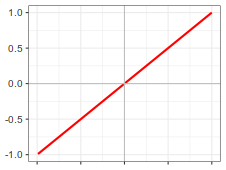

In [67]:
%%R -i identity -u cm -w 8 -h 6

p <- ggplot(identity, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + ylim(-1, 1) + xlim(-1, 1)
ggsave('activation-identity.png', unit='cm', height=6, width=8, plot=p)
print(p)

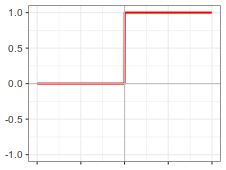

In [68]:
%%R -i step -u cm -w 8 -h 6

p <- ggplot(step, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + ylim(-1, 1)
ggsave('activation-step.png', unit='cm', height=6, width=8, plot=p)
print(p)

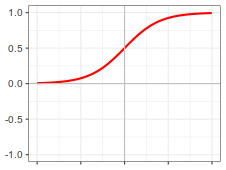

In [69]:
%%R -i sigmoid -u cm -w 8 -h 6

p <- ggplot(sigmoid, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + ylim(-1, 1)
ggsave('activation-sigmoid.png', unit='cm', height=6, width=8, plot=p)
print(p)

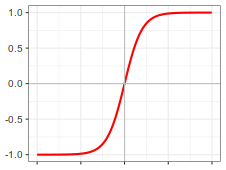

In [70]:
%%R -i tanh -u cm -w 8 -h 6

p <- ggplot(tanh, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + ylim(-1, 1)
ggsave('activation-tanh.png', unit='cm', height=6, width=8, plot=p)
print(p)

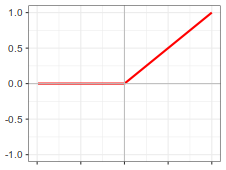

In [71]:
%%R -i relu -u cm -w 8 -h 6

p <- ggplot(relu, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + ylim(-1, 1) + xlim(-1, 1)
ggsave('activation-relu.png', unit='cm', height=6, width=8, plot=p)
print(p)

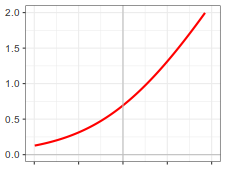

In [72]:
%%R -i softlus -u cm -w 8 -h 6

p <- ggplot(softlus, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + xlim(-2, 2) + ylim(0, 2)
ggsave('activation-softlus.png', unit='cm', height=6, width=8, plot=p)
print(p)

In [6]:
import pandas as pd
import numpy as np


X = pd.DataFrame(dict(x=np.arange(-15, 15, 0.01)))
sigmoid = X.assign(
    y = lambda x: 1 / (1 + np.exp(-x['x']))
)

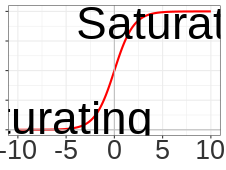

In [34]:
%%R -i sigmoid -u cm -w 8 -h 6

p <- ggplot(sigmoid, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + ylim(0, 1) + xlim(-10, 10) + annotate(
    'text', x=-7, y=0.1, label = 'Saturating', size = 12
) + annotate(
    'text', x=7, y=0.9, label = 'Saturating', size = 12
) + THEME_DEFAULT
ggsave('saturation-sigmoid.png', unit='cm', height=6, width=8, plot=p)
print(p)

In [361]:
import pandas as pd
import numpy as np


X = pd.DataFrame(dict(x=np.arange(-15, 15, 0.01)))
relu = X.assign(
    y = lambda x: np.where(x['x'] < 0, 0, x['x'])
)

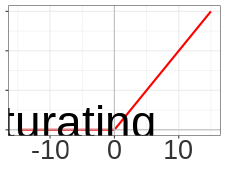

In [366]:
%%R -i relu -u cm -w 8 -h 6

p <- ggplot(relu, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + annotate(
    'text', x=-10, y=1, label = 'Saturating', size = 12
) + THEME_DEFAULT
ggsave('saturation-relu.png', unit='cm', height=6, width=8, plot=p)
print(p)

In [65]:
import pandas as pd
import numpy as np


X = pd.DataFrame(dict(x=np.arange(-15, 15, 0.01)))
X2 = X.assign(
    y = lambda x: -np.sqrt(np.square(15) - np.square(x['x']))
)

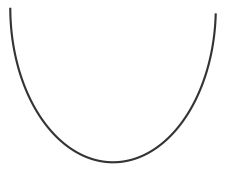

In [66]:
%%R -i X2 -u cm -w 8 -h 6

p <- ggplot(X2, aes(x=x, y=y)) + geom_line(
    linewidth=1, colour='grey20'
) + THEME_DEFAULT + theme(
    axis.text.x=element_blank(),
) + theme_void()
ggsave('X2.png', unit='cm', height=6, width=8, plot=p)
print(p)

In [95]:
import pandas as pd
import numpy as np

X = pd.DataFrame(dict(x=np.arange(0.01, 1, 0.01)))
X2 = X.assign(
    y1 = lambda x: - np.log(x['x']),
    y2 = lambda x: - np.log((1.0 - x['x']))
)

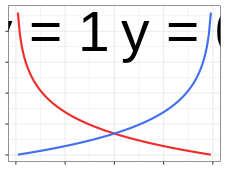

In [128]:
%%R -i X2 -u cm -w 8 -h 6

p <- ggplot(X2, aes(x=x)) + geom_line(
    aes(y=y1), linewidth=1, colour='firebrick2'
) + geom_line(
    aes(y=y2), linewidth=1, colour='royalblue2'
) + annotate(
    'text', label='y = 1', x=0.15, y=4, size=15
) + annotate(
    'text', label='y = 0', x=0.85, y=4, size=15
)+ THEME_DEFAULT + theme(
    axis.text.x=element_blank(),
)
ggsave('logloss.png', unit='cm', height=6, width=8, plot=p)
print(p)

In [132]:
import pandas as pd
import numpy as np

X = pd.DataFrame(dict(x=np.arange(0.01, 1, 0.01)))
X2 = X.assign(
    y1 = lambda x: np.square(1 - x['x']),
    y2 = lambda x: np.square(0 - x['x'])
)

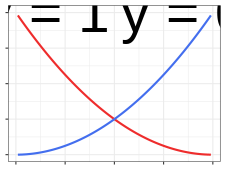

In [134]:
%%R -i X2 -u cm -w 8 -h 6

p <- ggplot(X2, aes(x=x)) + geom_line(
    aes(y=y1), linewidth=1, colour='firebrick2'
) + geom_line(
    aes(y=y2), linewidth=1, colour='royalblue2'
) + annotate(
    'text', label='y = 1', x=0.15, y=1, size=15
) + annotate(
    'text', label='y = 0', x=0.85, y=1, size=15
)+ THEME_DEFAULT + theme(
    axis.text.x=element_blank(),
)
ggsave('mse.png', unit='cm', height=6, width=8, plot=p)
print(p)

In [304]:
q1['q4'].describe()

count    299.000000
mean       3.607611
std        0.321639
min        2.320204
25%        3.444414
50%        3.719595
75%        3.862643
max        3.908465
Name: q4, dtype: float64

In [342]:
q1[['x', 'q4']]

,x,q4
0,-1.00,0.000000
1,-0.99,0.141067
2,-0.98,0.198997
3,-0.97,0.243105
4,-0.96,0.280000
...,...,...
195,0.95,0.312250
196,0.96,0.280000
197,0.97,0.243105
198,0.98,0.198997


In [337]:
np.sqrt(1 - np.square(-0.99))

0.14106735979665894

In [356]:
X = pd.DataFrame(dict(x=np.arange(-5, 5, 0.01)))
q1 = X.assign(
    q1 = lambda x: 0.5 * np.square(x['x']),
    q2 = lambda x: np.cos(x['x']) + np.sin(x['x']) ,
    q3 = lambda x: np.sin(np.power(x['x'], 2)),
    q4 = lambda x: np.power(np.power(x['x'], 2), 1/3) + np.sqrt((25 - np.square(x['x'])))
)

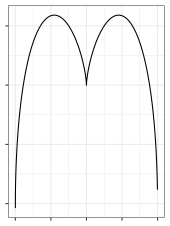

In [358]:
%%R -i q1 -u cm -w 6 -h 8

p <- ggplot(
    q1, aes(x=x, y=q1) 
) + geom_line() + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
)
ggsave('q1.png', unit='cm', height=6, width=6, plot=p)
print(p)


p <- ggplot(
    q1, aes(x=x, y=q2) 
) + geom_line() + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
)
ggsave('q2.png', unit='cm', height=6, width=6, plot=p)
print(p)


p <- ggplot(
    q1, aes(x=x, y=q3) 
) + geom_line() + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
)
ggsave('q3.png', unit='cm', height=6, width=6, plot=p)
print(p)


p <- ggplot(
    q1, aes(x=x, y=q4) 
) + geom_line() + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
)
ggsave('q4.png', unit='cm', height=6, width=6, plot=p)
print(p)

In [413]:
X['selu']

0       -0.749966
1       -0.749966
2       -0.749965
3       -0.749965
4       -0.749965
          ...    
1995    14.925000
1996    14.940000
1997    14.955000
1998    14.970000
1999    14.985000
Name: selu, Length: 2000, dtype: float64

In [414]:
X['elu']

0      -0.499977
1      -0.499977
2      -0.499977
3      -0.499977
4      -0.499976
          ...   
1995    9.950000
1996    9.960000
1997    9.970000
1998    9.980000
1999    9.990000
Name: elu, Length: 2000, dtype: float64

In [426]:

a = .3
s = 2
X = pd.DataFrame(dict(x=np.arange(-10, 10, 0.01))).assign(
    relu=lambda x: np.where(x['x'] >= 0, x['x'], 0) ,
    leaky=lambda x: np.where(x['x'] >= 0, x['x'], a * x['x']),
    elu=lambda x: np.where(x['x'] >= 0, x['x'], a * (np.exp(x['x']) - 1)),
    selu=lambda x: np.where(x['x'] >= 0, s * x['x'], s * a * (np.exp(x['x']) - 1)),
)


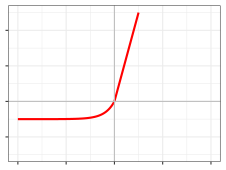

In [425]:
%%R -i X -u cm -w 8 -h 6

p <- ggplot(X, aes(x=x, y=relu)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
) + ylim(0, 5)
ggsave('relu-vanila.png', unit='cm', height=6, width=8, plot=p)
print(p)

p <- ggplot(X, aes(x=x, y=leaky)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
) + ylim(-3, 5)
ggsave('relu-leaky.png', unit='cm', height=6, width=8, plot=p)
print(p)

p <- ggplot(X, aes(x=x, y=elu)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
) + ylim(-3, 5)
ggsave('relu-elu.png', unit='cm', height=6, width=8, plot=p)
print(p)

p <- ggplot(X, aes(x=x, y=selu)) + geom_line(
    linewidth=1, colour='red'
) + geom_vline(
    xintercept=0, colour='grey'
) + geom_hline(
    yintercept=0, colour='grey'
) + THEME_DEFAULT + theme(
    axis.text.x = element_blank()
) + ylim(-3, 5)
ggsave('relu-selu.png', unit='cm', height=6, width=8, plot=p)
print(p)

In [29]:
import pandas as pd
import numpy as np


d = pd.read_csv('./HomeworkScore - Lab11 (HW09).csv').set_index('StudentID')

with open('./test.txt', mode='w') as f:
    for i in d.index:
        q1 = d.loc[i, "10-Fold CV Remark"]
        q1_grade = d.loc[i, "10-Fold CV"]
        q2 = d.loc[i, "Model Definition Remark"]
        q2_grade = d.loc[i, "Model Definition"]
        q3 = d.loc[i, "Loss and Optimizer Remark"]
        q3_grade = d.loc[i, "Loss and Optimizer"]
        q4 = d.loc[i, "Perf. Measure Remark"]
        q4_grade = d.loc[i, "Perf. Measure"]
        
        f.write(f'''
{i}
- 10-Fold CV ({q1_grade}/0.25 pt): {q1 if type(q1) == str else 'Good!'}
- Model Definition ({q2_grade}/1.5 pt): {q2 if type(q2) == str else 'Good!'}
- Loss function and Optimizer ({q3_grade}/0.5 pt): {q3 if type(q3) == str else 'Good!'}
- Performance Measures ({q4_grade}/0.75 pt): {q4 if type(q4) == str else 'Good!'}
        ''')
        
    

In [27]:
d

,StudentName,10-Fold CV,10-Fold CV Remark,Model Definition,Model Definition Remark,Loss and Optimizer,Loss and Optimizer Remark,Perf. Measure,Perf. Measure Remark,Sum
StudentID,,,,,,,,,,
20170348,Sihyeon Song,0.00,"While correctly defining a 10-Fold CV, you con...",1.50,NaN,0.5,NaN,0.25,"When calculating logistic loss, you put predic...",2.25
20190387,NAYOUNG OH,0.25,NaN,1.50,NaN,0.5,NaN,0.75,NaN,3.00
20190511,Jinseo Lee,0.00,The instruction required you to conduct a 10-f...,1.25,The instruction required you to use the parame...,0.5,NaN,0.75,NaN,2.50
20205642,PATARA TRIRAT,0.25,NaN,1.50,NaN,0.5,NaN,0.75,NaN,3.00
20223307,Minju Baeck,0.25,NaN,1.50,NaN,0.5,NaN,0.75,NaN,3.00
20223488,Yohan Lee,0.25,NaN,1.50,NaN,0.5,NaN,0.50,"When calculating logistic loss, you put predic...",2.75
20224492,IN JAE SONG,0.25,NaN,1.25,The instruction required you to use the parame...,0.5,NaN,0.50,"When calculating logistic loss, you put predic...",2.50
20224794,Junhyeok Park,0.25,NaN,1.50,NaN,0.5,NaN,0.75,NaN,3.00
20226497,Elena Ursula IMMEN,0.25,NaN,1.50,NaN,0.5,NaN,0.75,NaN,3.00


In [7]:
import hashlib
import os
import shutil


for i in os.listdir('./playground'):
    if not i.endswith('.json'):
        continue
    
    enc = hashlib.md5()
    name = i[:i.index('.json')]
    print(name)
    enc.update(name.encode('utf-8'))
    enc_name = enc.hexdigest()
    shutil.copy(os.path.join('./playground', i), os.path.join('./playground', 'proc', f'{enc_name}.json'))
    

ay_kim
baewoohyeok
brendonhp
caterina1118
champion1824
gykim622
hellokts
hy.jung
in-yi.kim
jimin_koo
jooyoungoh
juheekang
keums
kjun255
ksjldj
leejaymin
miykwon
mongeda
myaengsy
only826kaist
powyyy
sidlilac
sungyunz
taeyanglee
thfud0721
uhsa00
yangho.choi
yesol1017
yongkeolshin


In [4]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
a[np.nonzero(a == 1)]

array([1])

In [41]:
beta_0 = lambda r0, r1: - np.log(999) * (r0 + r1) / (r1 - r0)
beta_1 = lambda r0, r1: 2 * np.log(999) / (r1 - r0)
exp = lambda r0, r1, r: 1 / (1 + np.exp(-( beta_1(r0, r1) * r + beta_0(r0, r1) )))

In [57]:
exp(10, 2, 2)

0.9989999999999999

In [59]:
lin = lambda l0, l1, r0, r1, r: l0 + (r - r0) * (l1 - l0) / (r1 - r0)

In [77]:
a = np.array([5, 10, 15])
b = ['A', 'B', 'C', 'D']

np.digitize(14, bins=a)


2

In [83]:
import asyncio



AttributeError: module 'asyncio' has no attribute 'TaskGroup'